<a href="https://colab.research.google.com/github/Sohima/Delhi-Pollution-Predition/blob/main/AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import time
import requests
import sys

In [2]:
def retrieve_html():
  for year in range(2016,2021):
    for month in range(1,13):
      if(month<10):
        url='http://en.tutiempo.net/climate/0{}-{}/ws-421810.html'.format(month,year)
      else:
        url='http://en.tutiempo.net/climate/{}-{}/ws-421810.html'.format(month,year)
      texts=requests.get(url)
      text_utf=texts.text.encode('utf=8')
            
      if not os.path.exists("data/Html_Data/{}".format(year)):
        os.makedirs("data/Html_Data/{}".format(year))
      with open("data/Html_Data/{}/{}.html".format(year,month),"wb") as output:
        output.write(text_utf)
            
      sys.stdout.flush()
        
if __name__=="__main__":
    start_time=time.time()
    retrieve_html()
    stop_time=time.time()
    print("Time taken {}".format(stop_time-start_time))   


Time taken 49.10395264625549


#Extract AQI csv File

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

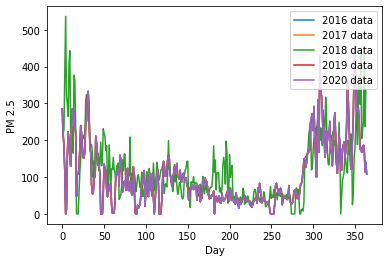

In [5]:

def avg_data_2016():
    temp_i=0
    average=[]
    for rows in pd.read_csv('data/AQI/aqi2016.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average
    
def avg_data_2017():
    temp_i=0
    average=[]
    for rows in pd.read_csv('data/AQI/aqi2017.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average
    
def avg_data_2018():
    temp_i=0
    average=[]
    for rows in pd.read_csv('data/AQI/aqi2018.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average

    
def avg_data_2019():
    temp_i=0
    average=[]
    for rows in pd.read_csv('data/AQI/aqi2019.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average
    
def avg_data_2020():
    temp_i=0
    average=[]
    for rows in pd.read_csv('data/AQI/aqi2020.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average
        

if __name__=="__main__":
    lst2016=avg_data_2016()
    lst2017=avg_data_2017()
    lst2018=avg_data_2018()
    lst2019=avg_data_2019()
    lst2020=avg_data_2020()
    plt.plot(range(0,365),lst2016,label="2016 data")
    plt.plot(range(0,365),lst2017,label="2017 data")
    plt.plot(range(0,364),lst2018,label="2018 data")
    plt.plot(range(0,365),lst2019,label="2019 data")
    plt.plot(range(0,365),lst2019,label="2020 data")
    plt.xlabel('Day')
    plt.ylabel('PM 2.5')
    plt.legend(loc='upper right')
    plt.show()

#Extract real time data

In [6]:
import requests
import sys
import pandas as pd
from bs4 import BeautifulSoup
import os
import csv


In [7]:
def met_data(month, year):
    
    file_html = open('data/Html_Data/{}/{}.html'.format(year,month), 'rb')
    plain_text = file_html.read()

    tempD = []
    finalD = []

    soup = BeautifulSoup(plain_text, "lxml")
    for table in soup.findAll('table', {'class': 'medias mensuales numspan'}):
        for tbody in table:
            for tr in tbody:
                a = tr.get_text()
                tempD.append(a)

    rows = len(tempD) / 15

    for times in range(round(rows)):
        newtempD = []
        for i in range(15):
            newtempD.append(tempD[0])
            tempD.pop(0)
        finalD.append(newtempD)

    length = len(finalD)

    finalD.pop(length - 1)
    finalD.pop(0)

    for a in range(len(finalD)):
        finalD[a].pop(6)
        finalD[a].pop(13)
        finalD[a].pop(12)
        finalD[a].pop(11)
        finalD[a].pop(10)
        finalD[a].pop(9)
        finalD[a].pop(0)

    return finalD


def data_combine(year, cs):
    for a in pd.read_csv('data/Real-Data/real_' + str(year) + '.csv', chunksize=cs):
        df = pd.DataFrame(data=a)
        mylist = df.values.tolist()
    return mylist


if __name__ == "__main__":
    if not os.path.exists("data/Real-Data"):
        os.makedirs("data/Real-Data")
    for year in range(2016, 2021):
        final_data = []
        with open('data/Real-Data/real_' + str(year) + '.csv', 'w') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            wr.writerow(
                ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'])
        for month in range(1, 13):
            temp = met_data(month, year)
            final_data = final_data + temp
            
        pm = getattr(sys.modules[__name__], 'avg_data_{}'.format(year))()

        if len(pm) == 364:
            pm.insert(364, '-')

        for i in range(len(final_data)-1):
            # final[i].insert(0, i + 1)
            final_data[i].insert(8, pm[i])

        with open('data/Real-Data/real_' + str(year) + '.csv', 'a') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            for row in final_data:
                flag = 0
                for elem in row:
                    if elem == "" or elem == "-":
                        flag = 1
                if flag != 1:
                    wr.writerow(row)
                    
    data_2016 = data_combine(2016, 600)
    data_2017 = data_combine(2017, 600)
    data_2018 = data_combine(2018, 600)
    data_2019 = data_combine(2019, 600)
    data_2020 = data_combine(2020, 600)
     
    total=data_2016+data_2017+data_2018+data_2019+data_2020    
    with open('data/Real-Data/Real_Combine.csv', 'w') as csvfile:
        wr = csv.writer(csvfile, dialect='excel')
        wr.writerow(
            ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'])
        wr.writerows(total)
        
        
df=pd.read_csv('data/Real-Data/Real_Combine.csv')


#Combine Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

combined_data = pd.read_csv('data/Real-Data/Real_Combine.csv')

combined_data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,16.4,22.4,9.0,1016.6,69.0,1.4,7.8,14.8,54.791667
1,28.0,30.3,26.0,997.4,90.0,2.6,9.4,16.5,0.000000
2,31.7,35.0,28.4,1001.4,70.0,3.5,12.0,20.6,37.625000
3,34.6,41.2,28.5,1004.5,38.0,2.7,17.4,22.2,105.750000
4,31.5,38.0,28.0,997.5,74.0,2.4,7.4,13.0,52.250000


In [52]:
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

#Linear Regression

In [11]:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
f'Coefficient of determination R^2 on train set {lin_reg.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of determination R^2 on train set 1.0'

In [13]:
f'Coefficient of determination R^2 on test set {lin_reg.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set -0.479639770111909'

In [14]:
lin_reg.coef_

array([-11.11452946,   6.14245349,   5.14305594,   0.06681716,
        -2.20240559, -11.96185053,  -3.03790233,   2.89871329])

In [15]:
lin_reg.intercept_

134.77241849492887

In [16]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, y, cv = 3)

In [17]:
score.mean()

-7.216503956513414

In [18]:
pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coeff'])

,Coeff
T,-11.114529
TM,6.142453
Tm,5.143056
SLP,0.066817
H,-2.202406
VV,-11.961851
V,-3.037902
VM,2.898713


In [19]:
c = 0
for val in lin_reg.coef_:
    effect = 'increase' if val>0 else 'decrease'
    print(f'Holding all other features fixed a 1 unit increase in {X.columns[c]} is associated with {effect} of val in AQI PM2.5')
    c = c+1

Holding all other features fixed a 1 unit increase in T is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in TM is associated with increase of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in Tm is associated with increase of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in SLP is associated with increase of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in H is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in VV is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in V is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in VM is associated with increase of val in AQI PM2.5


In [20]:
pred = lin_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


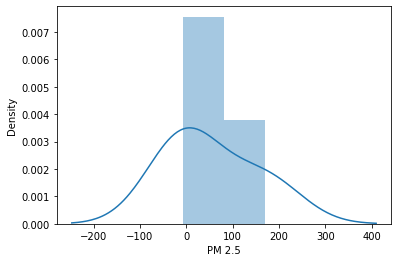

In [21]:
sns.distplot(y_test - pred)

In [22]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 59.02845445187008
Mean Sq Error: 9605.660979088343
Root Mean Error: 98.00847401673155


In [23]:
import pickle
pickle.dump(lin_reg, open('linreg.pkl', 'wb'))


In [24]:
np.mean(cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=3))
# neg_mean_squared_error must be as close to 0 as possible

-14576.458092485916

#Lasso

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_cv = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=3)
ridge_cv.fit(X,y)

In [26]:
ridge_cv.best_params_

{'alpha': 20}

In [27]:
ridge_cv.best_score_

-6959.020617059829

#lasso regression

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso(tol=1)
# used tol = 1 since warning was given that convergence not taking place
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 50]}
lasso_cv = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=3)
lasso_cv.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=1, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [29]:
lasso_cv.best_params_

{'alpha': 1}

In [30]:
lasso_cv.best_score_

-6619.455369894208

In [31]:
pred = lasso_cv.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


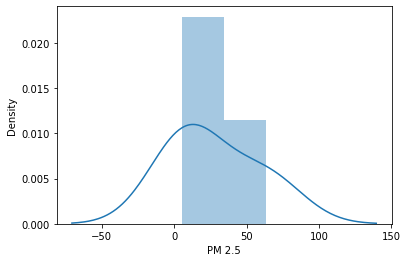

In [32]:
sns.distplot(y_test-pred)

In [33]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 27.473498895260274
Mean Sq Error: 1418.408672109416
Root Mean Error: 37.6617667151903


In [35]:
import pickle
pickle.dump(lasso_cv, open('lasso.pkl', 'wb'))

#Featuring

In [54]:
combined_data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,16.4,22.4,9.0,1016.6,69.0,1.4,7.8,14.8,54.791667
1,28.0,30.3,26.0,997.4,90.0,2.6,9.4,16.5,0.000000
2,31.7,35.0,28.4,1001.4,70.0,3.5,12.0,20.6,37.625000
3,34.6,41.2,28.5,1004.5,38.0,2.7,17.4,22.2,105.750000
4,31.5,38.0,28.0,997.5,74.0,2.4,7.4,13.0,52.250000


In [55]:
combined_data.dtypes

T         float64
TM        float64
Tm        float64
SLP       float64
H         float64
VV        float64
V         float64
VM        float64
PM 2.5    float64
dtype: object

In [56]:
for col in combined_data.columns[:-1]:
    combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce')

In [57]:

combined_data.isna().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

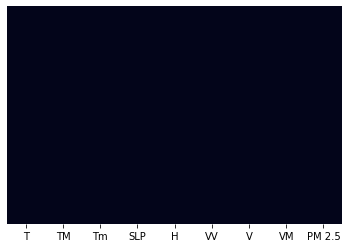

In [58]:
sns.heatmap(combined_data.isna(), yticklabels=False, cbar=False)

In [59]:

combined_data = combined_data.dropna()

In [60]:
combined_data.shape

(10, 9)

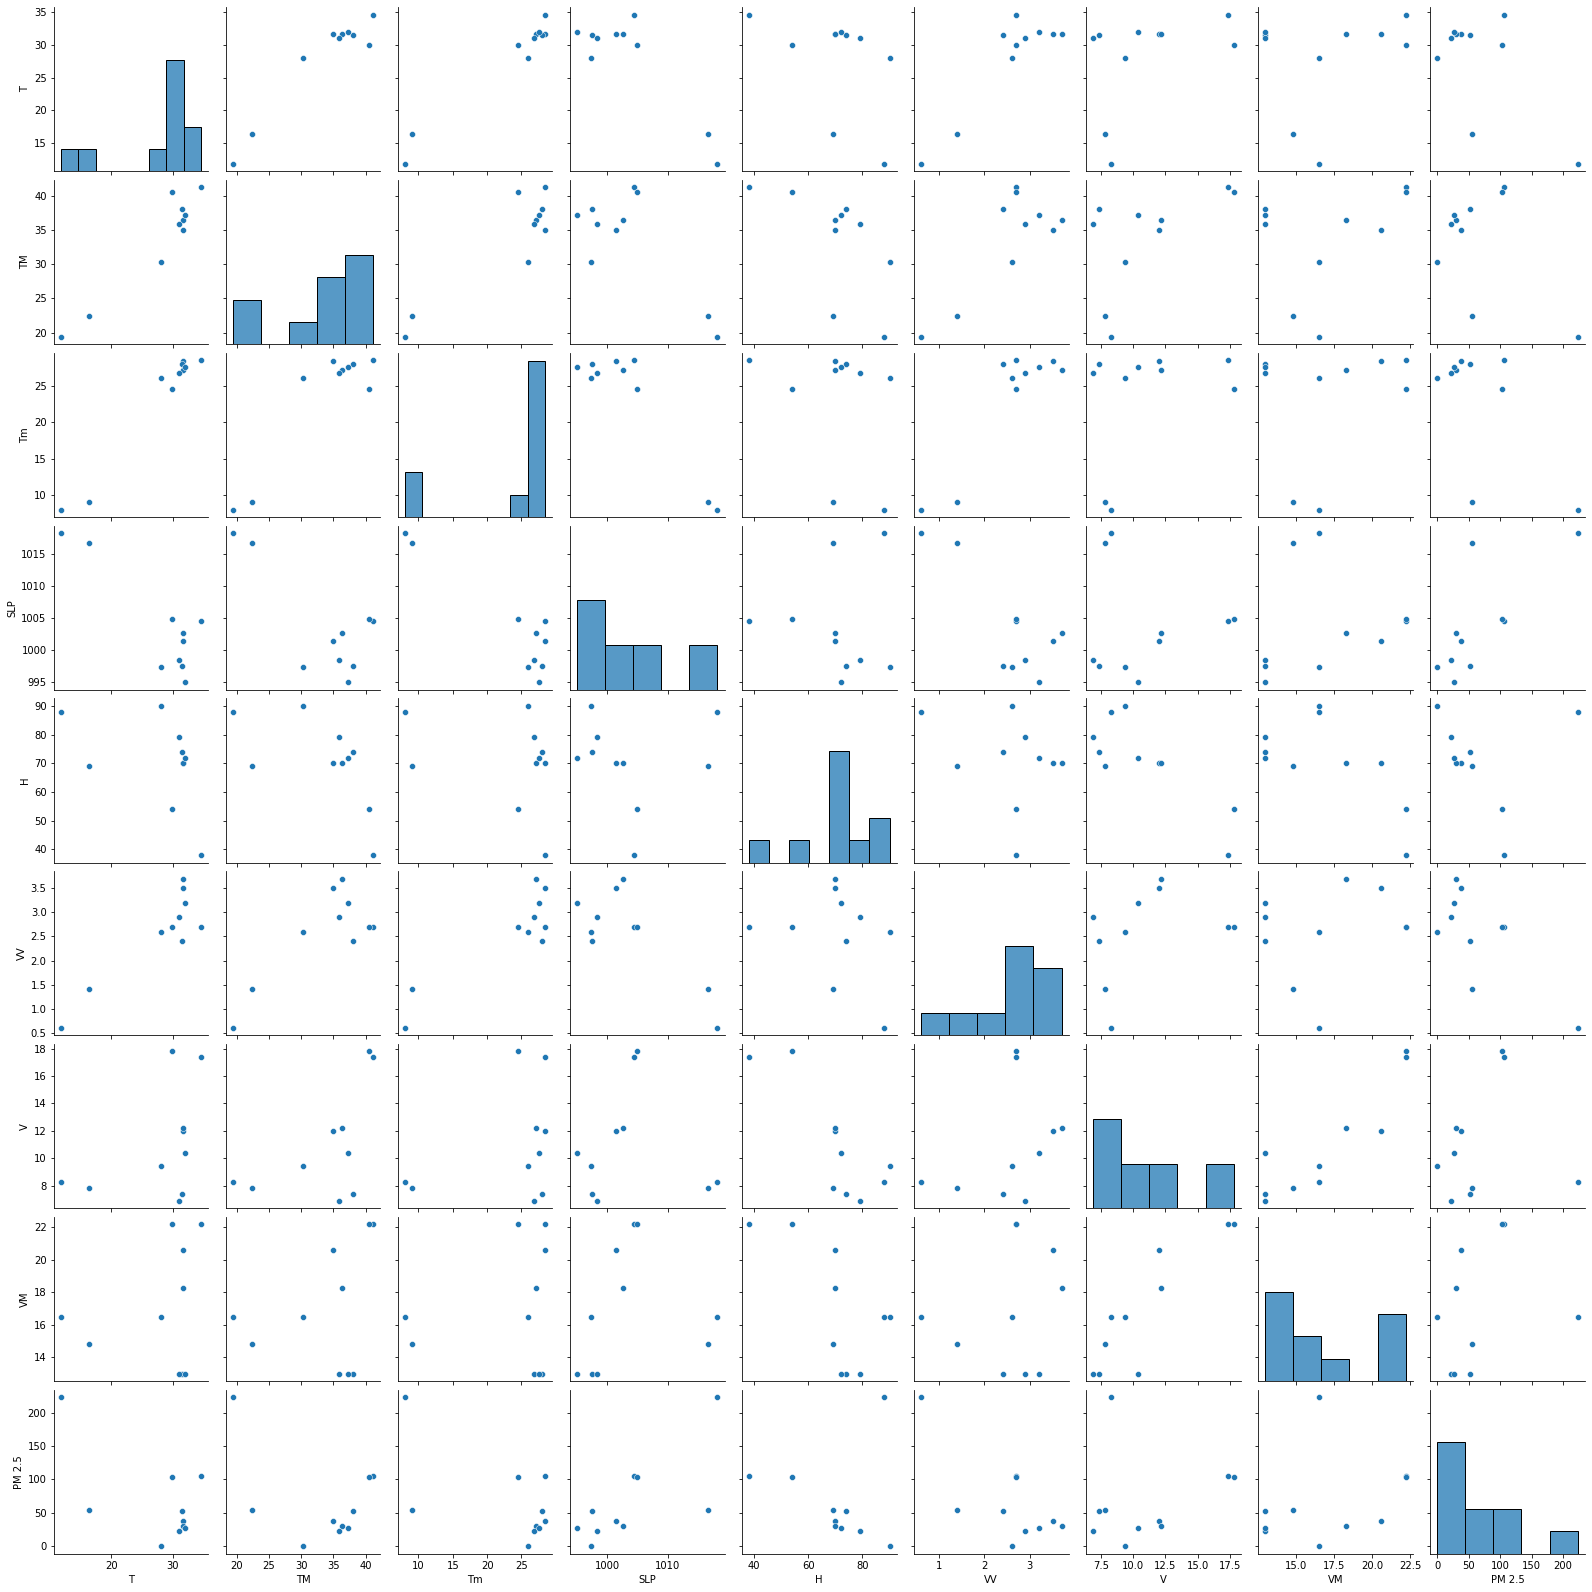

In [64]:
sns.pairplot(combined_data)

In [65]:

combined_data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.951652,0.981911,-0.858798,-0.456796,0.897524,0.438535,0.218362,-0.604835
TM,0.951652,1.000000,0.906015,-0.742579,-0.609865,0.793521,0.583420,0.313388,-0.409700
Tm,0.981911,0.906015,1.000000,-0.913771,-0.305766,0.890937,0.355085,0.168424,-0.611922
SLP,-0.858798,-0.742579,-0.913771,1.000000,-0.011389,-0.789390,-0.040189,0.186812,0.729953
H,-0.456796,-0.609865,-0.305766,-0.011389,1.000000,-0.281070,-0.817242,-0.644075,-0.097568
VV,0.897524,0.793521,0.890937,-0.789390,-0.281070,1.000000,0.356589,0.210210,-0.714247
V,0.438535,0.583420,0.355085,-0.040189,-0.817242,0.356589,1.000000,0.889322,0.175769
VM,0.218362,0.313388,0.168424,0.186812,-0.644075,0.210210,0.889322,1.000000,0.286107
PM 2.5,-0.604835,-0.409700,-0.611922,0.729953,-0.097568,-0.714247,0.175769,0.286107,1.000000


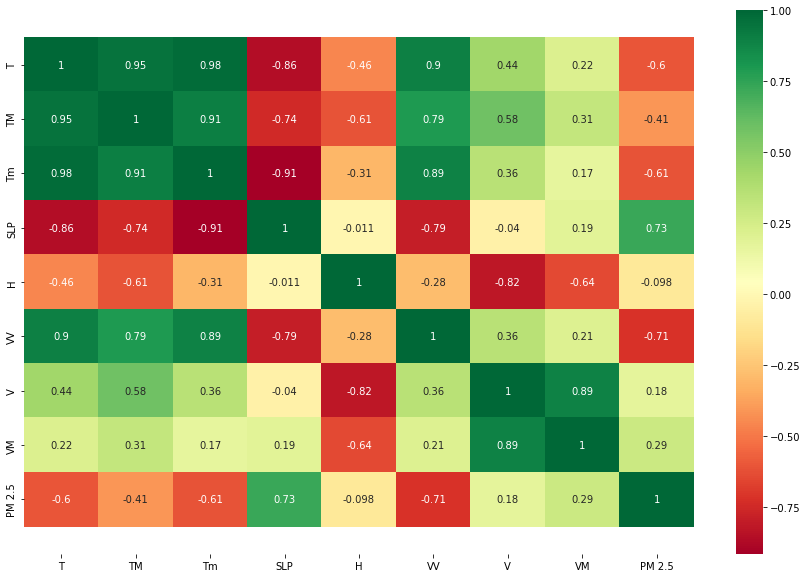

In [78]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(combined_data.corr(), annot=True,cmap="RdYlGn")
# need this since due to bug in current version of matplotlib and seaborn
# top and bottom rows are cut in half
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);


In [67]:
from sklearn.ensemble import ExtraTreesRegressor
feature_selector = ExtraTreesRegressor()
feature_selector.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [68]:

feature_selector.feature_importances_

array([0.18799398, 0.13790425, 0.10463851, 0.12393373, 0.09435214,
       0.21131992, 0.0841852 , 0.05567229])

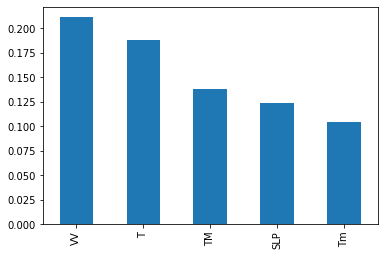

In [69]:
pd.Series(feature_selector.feature_importances_, index=X.columns).nlargest(5).plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


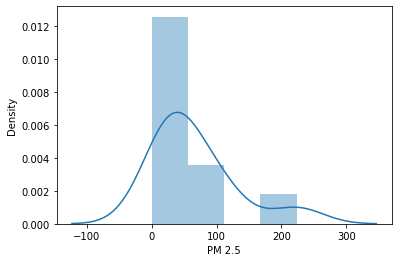

In [70]:
sns.distplot(y)

In [72]:
combined_data.to_csv('data/combined_data/cleaned_data.csv', index=None)